# 监督学习

## 逻辑回归

### 证明逻辑回归的对数最大似然函数的海森矩阵是半负定矩阵

对数最大似然函数表示如下：

$$
\ell(\theta) = \sum_{i=1}^m y^{(i)} \log h(x^{(i)})
+ (1 - y^{(i)}) \log (1 - h(x^{(i)}))
$$

其一阶导根据讲义的证明是：

$$
\frac {\partial \ell(\theta)} {\partial \theta_k} =
\sum_{i=1}^m (y - h_\theta (x^{(i)}))x_k^{(i)}
$$

海森矩阵单个元素可表示为：

$$
\begin{aligned}
H_{kl} &= \frac {\partial \ell(\theta)} {\partial \theta_k \theta_l} \\
&= - \sum_{i=1}^m \frac {\partial h_\theta (x^{(i)})} {\partial \theta_l} x_k^{(i)} \\
&= - \sum_{i=1}^m h_\theta(x^{(i)}) (1-h_\theta(x^{(i)})) x_l^{(i)}x_k^{(i)}
\end{aligned}
$$

海森矩阵可表示为：

$$H = - \sum_{i=1}^m h_\theta(x^{(i)}) (1-h_\theta(x^{(i)})) x^{(i)} x^{(i)T}$$

下面来证明$z^T H z \leq 0$ 恒成立。

$$
\begin{aligned}
z^T H z &= - z^T \sum_{i=1}^m h_\theta(x^{(i)}) (1-h_\theta(x^{(i)})) x^{(i)} x^{(i)T} z \\
&= - \sum_{i=1}^m h_\theta(x^{(i)}) (1-h_\theta(x^{(i)})) z^T x^{(i)} x^{(i)T} z \\
&= - \sum_{i=1}^m h_\theta(x^{(i)}) (1-h_\theta(x^{(i)})) (z^T x^{(i)})^2 \\
& \leq 0
\end{aligned}
$$

因此逻辑回归的对数最大似然函数的海森矩阵是一个半负定矩阵，其只有一个唯一的全局最大值。


### 用牛顿法来拟合逻辑回归模型

尽管牛顿法的表达式已经给出，但用 python 跑出这个程序还是花了我三个小时。主要的难点在于把前面的代数表示转化为矩阵表示，包括梯度和海森矩阵。下面给出我的 python 代码，用的是 python3。

In [1]:
from numpy import *
import pandas as pd

orx = pd.read_csv('q1x.dat', sep='\s+', header=None).values
y = pd.read_csv('q1y.dat', sep='\s+', header=None).values.ravel()

X = hstack((ones((orx.shape[0], 1)), orx))
theta = zeros(X.shape[1])


def h(theta):
    return 1/(1+exp(-dot(X, theta)))


def hd(theta):
    return dot(X.T, y - h(theta))


def hdd(theta):
    return -dot(X.T, tile(h(theta)*(1-h(theta)), (theta.size, 1)).T*X)


maxtry = 50

for i in range(maxtry):
    theta = theta - dot(linalg.inv(hdd(theta)), hd(theta))

print(theta)

[-2.6205116   0.76037154  1.17194674]


### 画图

这个纯粹的就是画图能力的考验，这一块前面看过《python machine learning》，还是比较容易的。

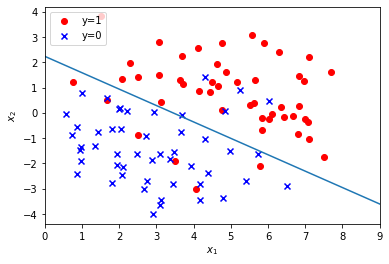

In [2]:
import matplotlib.pyplot as plt
plt.scatter(x = orx[y==1,0], y = orx[y==1,1], marker='o', color='red', label='y=1')
plt.scatter(x = orx[y==0,0], y = orx[y==0,1], marker='x', color='blue', label='y=0')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.xlim(0,9)
x1 = arange(0,10,1)
x2 = (-theta[0]-theta[1]*x1)/theta[2]
plt.plot(x1, x2)

## 局部加权回归

### 加权系数的矩阵表示

令$W_{ii}=\frac{1}{2} w^{(i)}，W_{ij}=0 \text{ for } i \neq j, \overrightarrow{z}=X\theta-\overrightarrow{y}, z_i=\theta^T x^{(i)}-y^{(i)}$，因此可以推导出下式：

$$
\begin{aligned}
J(\theta) &= (X\theta-\overrightarrow{y})^TW(X\theta-\overrightarrow{y}) \\
&=\overrightarrow{z}^TW \overrightarrow{z} \\
&=\frac{1}{2} \sum_{i=1}^m w^{(i)} z_i^2 \\
&= \frac{1}{2} \sum_{i=1}^m w^{(i)} (\theta^T x^{(i)}-y^{(i)})^2
\end{aligned}
$$

### 局部加权的标准方程

根据上式得到的损失函数，可以计算如下：

$$
\begin{aligned}
\nabla_{\theta}J(\theta)&=\nabla_{\theta}\frac{1}2(X\theta-\overrightarrow{y})^T W (X\theta-\overrightarrow{y})\\
&=\frac{1}2\nabla_{\theta}(\theta^T X^T W X\theta-\theta^TX^T W \overrightarrow{y}-\overrightarrow{y}^T W X\theta+\overrightarrow{y}^T W \overrightarrow{y})\\
&=\frac{1}2\nabla_{\theta}tr(\theta^TX^T W X\theta-\theta^TX^T W \overrightarrow{y}-\overrightarrow{y}^T W X\theta+\overrightarrow{y}^T W \overrightarrow{y})\\
&=\frac{1}2\nabla_{\theta}(tr\theta^TX^T W X\theta-2tr\overrightarrow{y}^T W X\theta)\\
&=\frac{1}2(X^T W X\theta+X^TWX\theta-2X^TW^T\overrightarrow{y}）\\
&=X^TWX\theta-X^TW\overrightarrow{y}
\end{aligned}
$$

令上式为 0，最终我们得出局部加权的标准方程为：

$$
\begin{aligned}
X^TWX\theta&=X^TW\overrightarrow{y}\\
\theta &= (X^TWX)^{-1}X^TW\overrightarrow{y}
\end{aligned}
$$

### 以 y 的方差表示加权系数

$$
\begin{aligned}
\ell(\theta)&=\log{L(\theta)}\\
&=\log\prod_{i=1}^m\frac{1}{\sqrt{2\pi}\sigma^{(i)}}\exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2})\\
&=\sum_{i=1}^m \log\frac{1}{\sqrt{2\pi}\sigma^{(i)}}\exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2})\\
&=\sum_{i=1}^m\log\frac{1}{\sqrt{2\pi}\sigma^{(i)}}-\frac{1}{2}\sum_{i=1}^{m}\frac{1}{(\sigma^{(i)})^2} (h_\theta(x^{(i)})-y^{(i)})^2 \\
&=\sum_{i=1}^m\log\frac{1}{\sqrt{2\pi}\sigma^{(i)}} - \frac{1}{2}\sum_{i=1}^{m} w^{(i)} (h_\theta(x^{(i)})-y^{(i)})^2
\end{aligned}
$$

即：

$$w^{(i)} = \frac{1}{(\sigma^{(i)})^2} $$

### 回归问题

#### 实现一般回归

用标准方程来写一般回归是比较容易的。

[0.32767539 0.17531122]


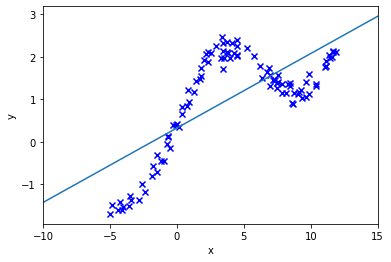

In [3]:
from numpy import *
import pandas as pd
orx = pd.read_csv('q2x.dat', sep = '\s+', header=None).values
y = pd.read_csv('q2y.dat', sep = '\s+', header=None).values.ravel()
X = hstack((ones((orx.shape[0],1)), orx))
theta = dot(dot(linalg.inv(dot(X.T,X)), X.T),y)
print(theta)

import matplotlib.pyplot as plt
plt.scatter(x = orx.ravel(), y = y, marker='x', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10,15)
xl = arange(-10,16,1)
yl = theta[0]+theta[1]*xl
plt.plot(xl, yl)

#### 实现局部加权线性回归

最终的图形如下（这图还可以优化一下），局部线性回归可以较好的拟合散点。

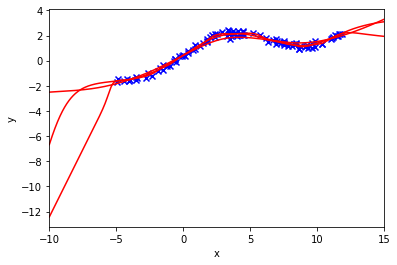

In [6]:
Xl = arange(-10, 15.01, 0.02)
def plot_t(t):
    Xl = arange(-10, 15.01, 0.02)
    Ylo = []
    for xl in Xl:
        w = exp(-(orx.ravel()-xl)**2/(2*t**2))
        W = diag(w)
        theta = dot(dot(dot(linalg.pinv(dot(dot(X.T,W),X)),X.T),W),y)
        yl = dot(theta.T,array([1,xl]))
        Ylo.append(yl)
        Yl = array(Ylo)
    plt.plot(Xl,Yl,color='red')
plt.scatter(x = orx.ravel(), y = y, marker='x', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10,15)
plot_t(0.8)
plot_t(0.3)
plot_t(2)

#### 带宽的影响

带宽决定了影响模型的样本数量多少。带宽越小，影响模型的样本越少，模型也更容易受噪音影响，上面当带宽变 0.1 时，直接导致矩阵不可逆。带宽越大，影响模型的样本越多，模型更趋于一般线性回归。

## 泊松回归和指数分布簇

### 证明泊松分布属于指数分布族

$$
\begin{aligned}
p(y;\lambda) &= \frac {e^{-\lambda} \lambda^y} {y!} \\
&= \frac{1}{y!} \exp(y \log \lambda - \lambda)
\end{aligned}
$$

因此可以得到：

$$
\begin{aligned}
b(y) &= \frac{1}{y!} \\
T(y) &= y \\
\eta &= \log \lambda \Rightarrow \lambda = e^\eta \\
a(\eta) &= \lambda = e^\eta
\end{aligned}
$$

### 泊松模型的正则响应函数

$$
\begin{aligned}
g(\eta) &= E[T(y); \eta] \\
&= E[y; \eta] \\
&= \lambda \\
&= e^\eta
\end{aligned}
$$

### 泊松模型的随机梯度下降

$$
\begin{aligned}
\frac {\partial \ell(\theta)} {\theta_j} &= \frac {\partial \log p(y^{(i)} \mid x^{(i)}; \theta)} {\partial \theta_j} \\
&= \frac {\partial \log ( \frac {1} {y^{(i)}!} \exp(\eta^Ty^{(i)} - e^\eta))}{\partial \theta_j} \\
&= \frac {\partial ((\theta^Tx^{(i)})^Ty^{(i)} - e^{\theta^Tx^{(i)}})} {\partial \theta_j} \\
&= \frac{\partial ((\sum_k \theta_k x_k^{(i)})y^{(i)} - e^{\sum_k \theta_k x_k^{(i)}})}{\partial \theta_j} \\
&= x_j^{(i)} y^{(i)} - e^{\sum_k \theta_k x_k^{(i)}} x_j^{(i)} \\
&= (y^{(i)} - e^{\theta^T x^{(i)}})x_j^{(i)}
\end{aligned}
$$

随机梯度上升的规则是：

$$
\begin{aligned}
\theta_j & := \theta_j + \alpha \frac {\partial \ell(\theta)} {\partial \theta_j} \\
& := \theta_j + \alpha (y^{(i)} - e^{\theta^T x^{(i)}})x_j^{(i)}
\end{aligned}
$$

### 证明递归规则的通用性

首先可以得出：

$$
\begin{aligned}
\frac {\partial \ell(\theta)} {\partial \theta_j} &= \frac {\partial \log p(y^{(i)} \mid x^{(i)}; \theta)} {\partial \theta_j} \\
&= \frac {\partial \log (b(y) \exp (\eta^Ty - a(\eta)))} {\partial \theta_j} \\
&= \frac {\partial (\eta^Ty - a(\eta))} {\partial \theta_j} \\
&= x_jy - \frac {\partial a(\eta)} {\partial \eta} x_j \\
&= (y - \frac {\partial a(\eta)} {\partial \eta}) x_j
\end{aligned}
$$

因此只需要证明 $\frac {\partial a(\eta)} {\partial \eta} = h(x)$ 即可得证。

$$
\begin{aligned}
\int_y p(y \mid x; \theta)dy &= 1 \\
\int_y b(y) \exp (\eta^Ty - a(\eta))dy &= 1 \\
\int_y b(y) \exp (\eta^Ty)dy &= \exp(a(\eta))
\end{aligned}
$$

等式两边对$\eta$求导：

$$
\begin{aligned}
\int_y b(y) \exp (\eta^Ty)dy &= \exp(a(\eta)) \frac {\partial a(\eta)} {\partial \eta} \\
\frac {\partial a(\eta)} {\partial \eta} &= \int_y b(y) y \exp (\eta^Ty - a(\eta))dy \\
&= \int_y y p(y \mid x; \theta)dy \\
&= E[y \mid x; \theta] = h(x)
\end{aligned}
$$

因此上面的递归规则具有通用性。

## 高斯判别分析

### 高斯判别分析与逻辑回归的关系

$$
\begin{aligned}
p(y=1 \mid x; \phi, \Sigma, \mu_0, \mu_1) &= \frac {p(x \mid y=1; \phi, \Sigma, \mu_0, \mu_1) p(y=1; \phi, \Sigma, \mu_0, \mu_1)} {p(x; \phi, \Sigma, \mu_0, \mu_1)} \\
&= \frac {p(x \mid y=1; \phi, \Sigma, \mu_0, \mu_1) p(y=1; \phi, \Sigma, \mu_0, \mu_1)} {p(x \mid y=1; \phi, \Sigma, \mu_0, \mu_1) p(y=1; \phi, \Sigma, \mu_0, \mu_1) + p(x \mid y=0; \phi, \Sigma, \mu_0, \mu_1) p(y=0; \phi, \Sigma, \mu_0, \mu_1)} \\
&= \frac { \exp\left(-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)\right)\phi} { \exp\left(-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)\right)\phi + \exp\left(-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)\right)(1-\phi)} \\
&=\frac {1} {1+ \exp\left(\log( \frac {1-\phi} {\phi})-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)+\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)\right)} \\
&= \frac{1} {1 + \exp \left(-\frac{1}{2} (-2\mu_0^T\Sigma^{-1}x + \mu_0^T\Sigma^{-1}\mu_0 + 2\mu_1^T\Sigma^{-1}x - \mu_1^T\Sigma^{-1}\mu_1) + \log ( \frac {1-\phi} {\phi})\right)}
\end{aligned}
$$

因此可以得到：

$$
\theta =
\begin{bmatrix}
\frac{1}{2}(\mu_0^T\Sigma^{-1}\mu_0-\mu_1^T\Sigma^{-1}\mu_1) - \log( \frac {1-\phi} {\phi}) \\
\Sigma^{-1}\mu_1 - \Sigma^{-1}\mu_0
\end{bmatrix}
$$

### 模型参数推导

$$
\begin{aligned}
\ell(\phi,\mu_0,\mu_1,\Sigma) &= \log \prod_{i=1}^m p(x^{(i)} \mid y^{(i)}; \mu_0, \mu_1, \Sigma) p(y^{(i)}; \phi) \\
&= \sum_{i=1}^m \log p(x^{(i)} \mid y^{(i)}; \mu_0, \mu_1, \Sigma) + \sum_{i=1}^m \log p(y^{(i)}; \phi) \\
&\simeq \sum_{i=1}^m [\frac{1}{2} \log \frac{1}{\left| \Sigma \right|} -\frac{1}{2}(x^{(i)}-\mu_{y^{(i)}})^T\Sigma^{-1}(x^{(i)}-\mu_{y^{(i)}}) + y^{(i)} \log \phi + (1 - y^{(i)}) \log(1-\phi)]
\end{aligned}
$$

然后分别对各参数求偏导。

首先求解$\phi$

$$
\begin{aligned}
\frac{\partial \ell} {\partial \phi} &= \sum_{i=1}^m \left[\frac{y^{(i)}}{\phi} - \frac {1-y^{(i)}} {1 - \phi} \right] \\
&= \frac{\sum_{i=1}^m 1\{y^{(i)}=1\}}{\phi} - \frac{m - \sum_{i=1}^m 1\{y^{(i)}=1\}}{1-\phi}
\end{aligned}
$$

令上式为0，可以得到：

$$
\phi = \frac{1}{m}\sum_{i=1}^m1\{y^{(1)}\}
$$

再求解$\mu_0$

$$
\begin{aligned}
\nabla_{\mu_0} \ell &= -\frac{1}{2} \sum_{i:y^{(i)}=0}\nabla_{\mu_0}(x^{(i)}-\mu_0)^T\Sigma^{-1}(x^{(i)}-\mu_0) \\
&= -\frac{1}{2} \sum_{i:y^{(i)}=0}\nabla_{\mu_0} [\mu_0^T\Sigma^{-1}\mu_0-{x^{(i)}}^T \Sigma^{-1} \mu_0 - \mu_0^T \Sigma^{-1} x^{(i)}] \\
&= -\frac{1}{2} \sum_{i:y^{(i)}=0}\nabla_{\mu_0} tr[\mu_0^T\Sigma^{-1}\mu_0-{x^{(i)}}^T \Sigma^{-1} \mu_0 - \mu_0^T \Sigma^{-1} x^{(i)}] \\
&= -\frac{1}{2} \sum_{i:y^{(i)}=0} [2\Sigma^{-1} \mu_0 - 2\Sigma^{-1} x^{(i)}]
\end{aligned}
$$

令上式为0，可以得到，$\mu_1$同理：

$$
\mu_0 = \frac{\sum_{i=1}^m1\{y^{i}=0\}x^{(i)}}{\sum_{i=1}^m1\{y^{i}=0\}}
$$

最后求解$\Sigma$，为方便计算，对$S = \Sigma^{-1}$求偏导：

$$
\begin{aligned}
\nabla_S \ell &= \sum_{i=1}^m \nabla_S [\frac{1}{2} \log \left| S \right| - \frac{1}{2}(x^{(i)}-\mu_{y^{(i)}})^TS(x^{(i)}-\mu_{y^{(i)}})] \\
&= \sum_{i=1}^m [\frac{1}{2\left| S \right|}\nabla_S \left| S \right| - \frac{1}{2}\nabla_S(x^{(i)}-\mu_{y^{(i)}})^TS(x^{(i)}-\mu_{y^{(i)}})] \\
&= \sum_{i=1}^m[\frac{1} {2} S^{-1} - \frac{1} {2} (x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T] \\
&= \frac{1}{2} \sum_{i=1}^m[\Sigma - (x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T]
\end{aligned}
$$

令上式为0，可以得到：

$$
\Sigma = \frac{1}{m}\sum_{i=1}^m(x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T
$$


## 优化算法线性不变性

### 证明牛顿法是线性不变的

令$g(z)=f(Az)$，需要找到$\nabla_z g(z)$和$\nabla_z^2 g(z)$的$f(z)$表示。

$$
\begin{aligned}
\frac {\partial g(z)} {\partial z_i} &=
\sum_{k=1}^n \frac{\partial f(Az)} {\partial (Az)_k}
\frac{\partial (Az)_k} {partial z_i} \\
&= \sum_{k=1}^n \frac{\partial f(Az)} {\partial (Az)_k} A_{ki} \\
&= \sum_{k=1}^n \frac{\partial f(Az)} {\partial x_k} A_{ki}
\end{aligned}
$$

上式等同于：

$$
\frac {\partial g(z)} {\partial z_i} =
A_{\cdot i}^T \nabla_x f(Az)
$$

其中$A_{\cdot i}$是A的第i列。因此有：

$$
\nabla_z g(z) = A^T \nabla_x f(Az)
$$

再来定义海森矩阵$\nabla_z^2 g(z)$：

$$
\begin{aligned}
\frac {\partial^2 g(z)} {\partial z_i \partial z_j}
&= \frac {\partial} {\partial z_j} \sum_{k=1}^n \frac{\partial f(Az)} {\partial (Az)_k} A_{ki} \\
&= \sum_l \sum_k \frac{\partial^2 f(Az)} {\partial x_l \partial x_k} A_{kj} A_{lj}
\end{aligned}
$$

因此有:

$$H_g(z) = A^T H_f(Az) A$$

下面来推导对于函数$f(Ax)$的牛顿方法：

$$
\begin{aligned}
z^{(i+1)} &= z^{(i)} - H_g(z^{(i)})^{-1} \nabla_z g(z^{(i)}) \\
&= z^{(i)} - (A^T H_f(Az^{(i)}) A)^{-1} A^T \nabla_x f(Az^{(i)}) \\
&= z^{(i)} - A^{-1}H_f(Az^{(i)})^{-1}(A^T)^{-1}A^T \nabla_x f(Az^{(i)}) \\
&= z^{(i)} - A^{-1}H_f(Az^{(i)})^{-1}\nabla_x f(Az^{(i)})
\end{aligned}
$$

只需要证明$Az^{(i+1)}=x^{(i+1)}$，即完成证明：

$$
\begin{aligned}
Az^{(i+1)} &= A(z^{(i)} - A^{-1}H_f(Az^{(i)})^{-1}\nabla_x f(Az^{(i)})) \\
&= Az^{(i)} - H_f(Az^{(i)})^{-1}\nabla_x f(Az^{(i)}) \\
&= x^{(i)} - H_f(x^{(i)})^{-1} \nabla_x f(x^{(i)}) \\
&= x^{(i+1)}
\end{aligned}
$$


### 证明梯度下降法不是线性不变

在$g(z)$上应用梯度下降规则：

$$
z^{(i+1)} = z^{(i)} - \alpha A^T \nabla_x f(Az^{(i)})
$$

在$$f(x)%%上应用梯度下降规则：

$$
x^{(i+1)} = x^{(i)} - \alpha \nabla_x f(x^{(i)})
$$

要使得$x^{(i+1)} = A z^{(i+1)}$ 成立，

$$
\begin{aligned}
Az^{(i+1)} &= z^{(i)} - \alpha AA^T \nabla_x f(Az^{(i)}) \\
&= x^{(i)} - \alpha AA^T \nabla_x f(x^{(i)})
\end{aligned}
$$

必须在$AA^T=I$成立的条件下才能成立，因此梯度下降法不是线性不变的。
